# 학습 데이터 EDA ( 원본 )

In [35]:
import json
import os
import pandas as pd



json_file_pathes = '/opt/ml/input/Project/bug_data/Training/label' # label json 폴더 경로
json_file_names = os.listdir(json_file_pathes)

bug_data = []
meta_data = []

for file in json_file_names:
    with open(os.path.join(json_file_pathes,file)) as f:
        json_object = json.load(f)
    
    fname = json_object['description']['image']
    crop = json_object['annotations']['crop']
    risk = json_object['annotations']['risk']
    object_list = json_object['annotations']['object']
    for object_one in object_list:
        bug_data.append([fname, object_one['class']])
    
    meta_data.append([fname,crop,risk])

bug_df = pd.DataFrame(bug_data,
                        columns = ['image_name','bug'])

meta_df = pd.DataFrame(meta_data,columns=['image_name','crop','risk'])
    

{'description': {'image': 'V006_78_2_11_05_07_31_0_6607q_20200928_138.jpg', 'date': '2020/09/28', 'height': 3024, 'width': 4032, 'task': 78, 'type': 2, 'region': 5}, 'annotations': {'crop': 5, 'area': 7, 'risk': 0, 'object': [{'id': 0, 'class': 11, 'grow': 31, 'points': [{'xtl': 2213, 'ytl': 1012, 'xbr': 2255, 'ybr': 1059}]}, {'id': 1, 'class': 11, 'grow': 31, 'points': [{'xtl': 1837, 'ytl': 1694, 'xbr': 1875, 'ybr': 1740}]}]}}


In [34]:
bug_df.head(5)
meta_df.head(5)

,image_name,crop,risk
0,V006_78_3_11_05_03_12_2_8376w_20201012_1066_a0...,5,2
1,V006_78_2_10_05_07_32_0_4669q_20201207_18_a000...,5,0
2,V006_78_2_11_05_07_32_1_9198e_20201115_8_a0006...,5,1
3,V006_78_2_11_05_07_32_1_9198e_20201117_3_a0007...,5,1
4,V006_78_2_10_05_07_32_0_9747q_20201207_59_a000...,5,0


## 총 데이터 수

In [17]:
print(bug_df.shape)
print(meta_df.shape)

(174016, 2)
(151352, 3)


## 작물 분포 (5 : 배추)

<AxesSubplot:xlabel='crop', ylabel='crop'>

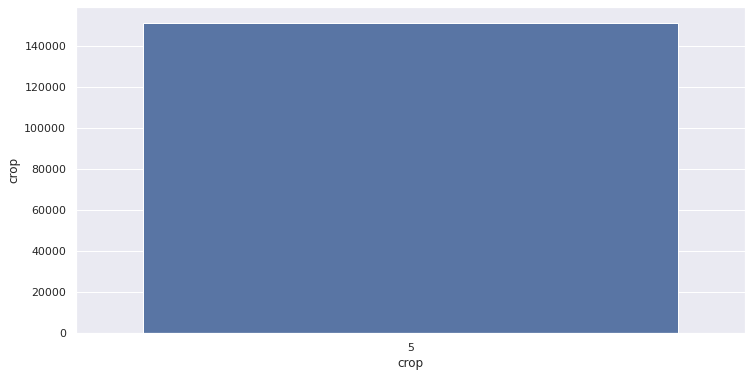

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,6)})

sns.barplot(data=meta_df,
  x="crop",
  y="crop",
  estimator=len)



# 질병 피해 정도 분포 ( 0 : 정상 , 1 : 초기 , 2 : 중기 , 3 : 말기 )

<AxesSubplot:xlabel='risk', ylabel='risk'>

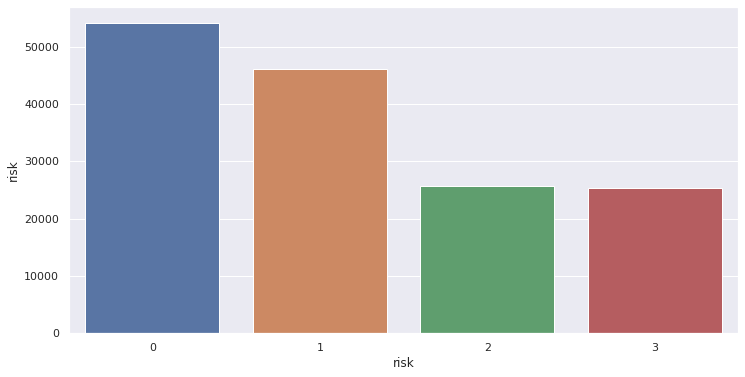

In [18]:
sns.barplot(data=meta_df,
  x="risk",
  y="risk",
  estimator=len)

## 벌레 분포 

<AxesSubplot:xlabel='bug', ylabel='bug'>

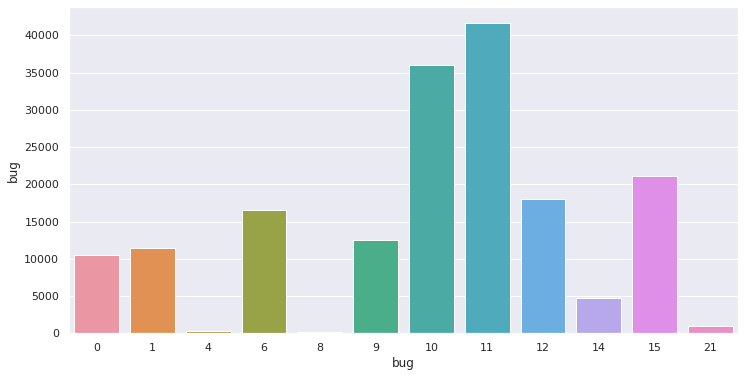

In [19]:
sns.barplot(data=bug_df,
  x="bug",
  y="bug",
  estimator=len)

# Validation 데이터 EDA ( 원본 )

In [29]:
import json
import os
import pandas as pd



json_file_pathes = '/opt/ml/input/Project/bug_data/Validation/label' # label json 폴더 경로
json_file_names = os.listdir(json_file_pathes)

bug_data = []
meta_data = []

for file in json_file_names:
    with open(os.path.join(json_file_pathes,file)) as f:
        json_object = json.load(f)

    fname = json_object['description']['image']
    crop = json_object['annotations']['crop']
    risk = json_object['annotations']['risk']
    object_list = json_object['annotations']['object']
    for object_one in object_list:
        bug_data.append([fname, object_one['class']])
    
    meta_data.append([fname,crop,risk])

bug_df = pd.DataFrame(bug_data,
                        columns = ['image_name','bug'])

meta_df = pd.DataFrame(meta_data,columns=['image_name','crop','risk'])
    

In [30]:
bug_df.head(5)
meta_df.head(5)

,image_name,crop,risk
0,V006_78_3_11_05_03_12_2_8376w_20201012_1066_a0...,5,2
1,V006_78_2_10_05_07_32_0_4669q_20201207_18_a000...,5,0
2,V006_78_2_11_05_07_32_1_9198e_20201115_8_a0006...,5,1
3,V006_78_2_11_05_07_32_1_9198e_20201117_3_a0007...,5,1
4,V006_78_2_10_05_07_32_0_9747q_20201207_59_a000...,5,0


## 총 데이터 수

In [31]:
print(bug_df.shape)
print(meta_df.shape)

(2905, 2)
(2784, 3)


## 작물 분포 (5 : 배추)

<AxesSubplot:xlabel='crop', ylabel='crop'>

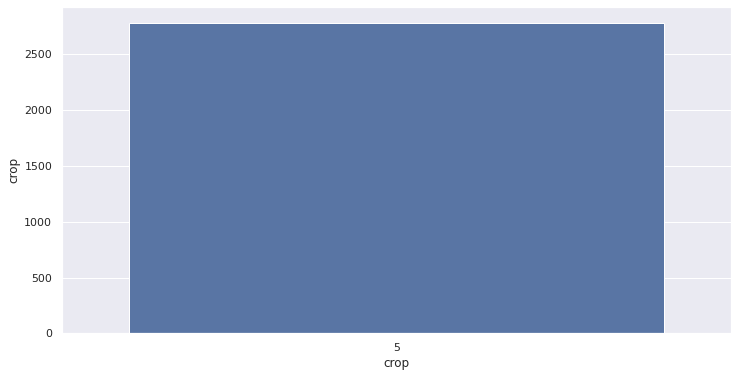

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,6)})

sns.barplot(data=meta_df,
  x="crop",
  y="crop",
  estimator=len)



# 질병 피해 정도 분포 ( 0 : 정상 , 1 : 초기 , 2 : 중기 , 3 : 말기 )

<AxesSubplot:xlabel='risk', ylabel='risk'>

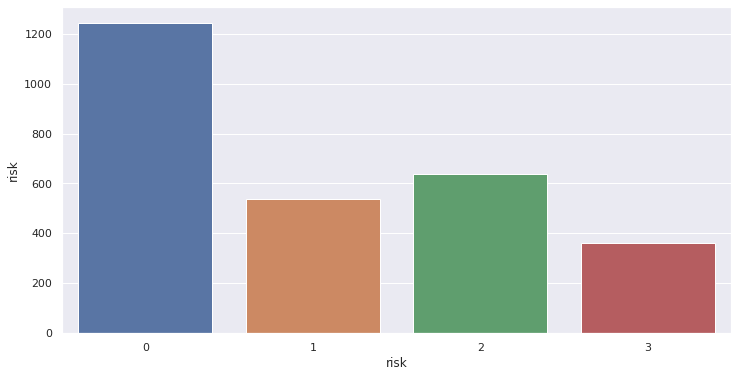

In [33]:
sns.barplot(data=meta_df,
  x="risk",
  y="risk",
  estimator=len)

## 벌레 분포 (10 : 배추좀나방 11 : 배추흰나비 12 : 벼룩잎벌레 15 : 비단노린재 )

<AxesSubplot:xlabel='bug', ylabel='bug'>

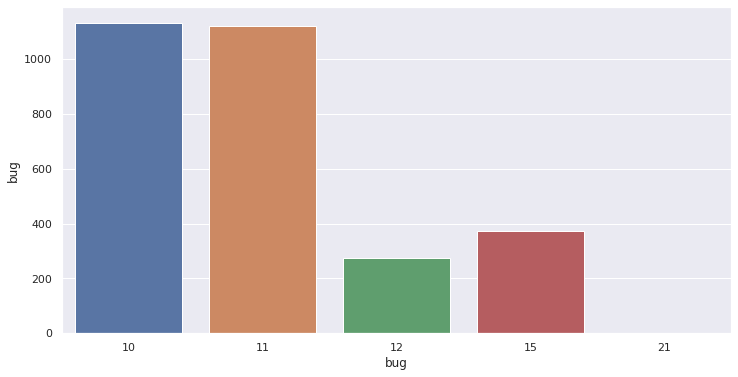

In [28]:
sns.barplot(data=bug_df,
  x="bug",
  y="bug",
  estimator=len)